In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
import json
import seaborn as sns
import warnings
from scipy import stats

ModuleNotFoundError: No module named 'data_loader'

In [ ]:
# seeding
np.random.seed(0)

In [ ]:
import sys
sys.path.insert(0, '../src/data')

# modularized imports
from data_loader import load_config, load_data

config = load_config()
data_path = config['data_path']
df = load_data(data_path)

In [ ]:
# count amount of unique ids for each lab
lab_counts = df['lab'].value_counts()
print(lab_counts)

lab
3.0    885404
1.0    619534
5.0    194307
2.0    184500
4.0     74546
Name: count, dtype: int64


In [ ]:
# number of unique combinations of lab and mouseIDs
number_of_unique_combinations = df.groupby(['lab', 'mouseID']).ngroups
number_of_unique_combinations

150

In [ ]:
# unique id, L{lab}, M{mouseID}
df['unique_id'] = df['lab'].astype(str) + '_' + df['mouseID'].astype(str)
df['unique_id'] = df['unique_id'].astype('category').cat.codes + 1
df.head()

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,1.0,1.0,3.0,1.0,1
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,1.0,1.0,3.0,2.0,1
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,1.0,1.0,3.0,3.0,1
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,1.0,1.0,1.0,6.0,1
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,1.0,1.0,1.0,7.0,1


In [ ]:
# print epoch value of the second dataframe index

print(df.loc[0, 'epoch'])

1.0


In [ ]:
# Mapping sleep stages to names
df['sleepstage_name'] = df['sleepstage'].map({1: 'Wake', 2: 'NREM', 3: 'REM'})

# EEG features
eeg_features = ['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'rms']

# sleep stages
# 1 = wake 
# 2 = NREM
# 3 = REM

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

# Your existing code
sampled_df = df.sample(n=1000, random_state=42)  # Adjust n as needed

# Create a pair plot
sns.pairplot(sampled_df, vars=['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'rms'], 
             hue='sleepstage_name', palette='coolwarm')

# Show the plot
plt.show()

NameError: name 'df' is not defined

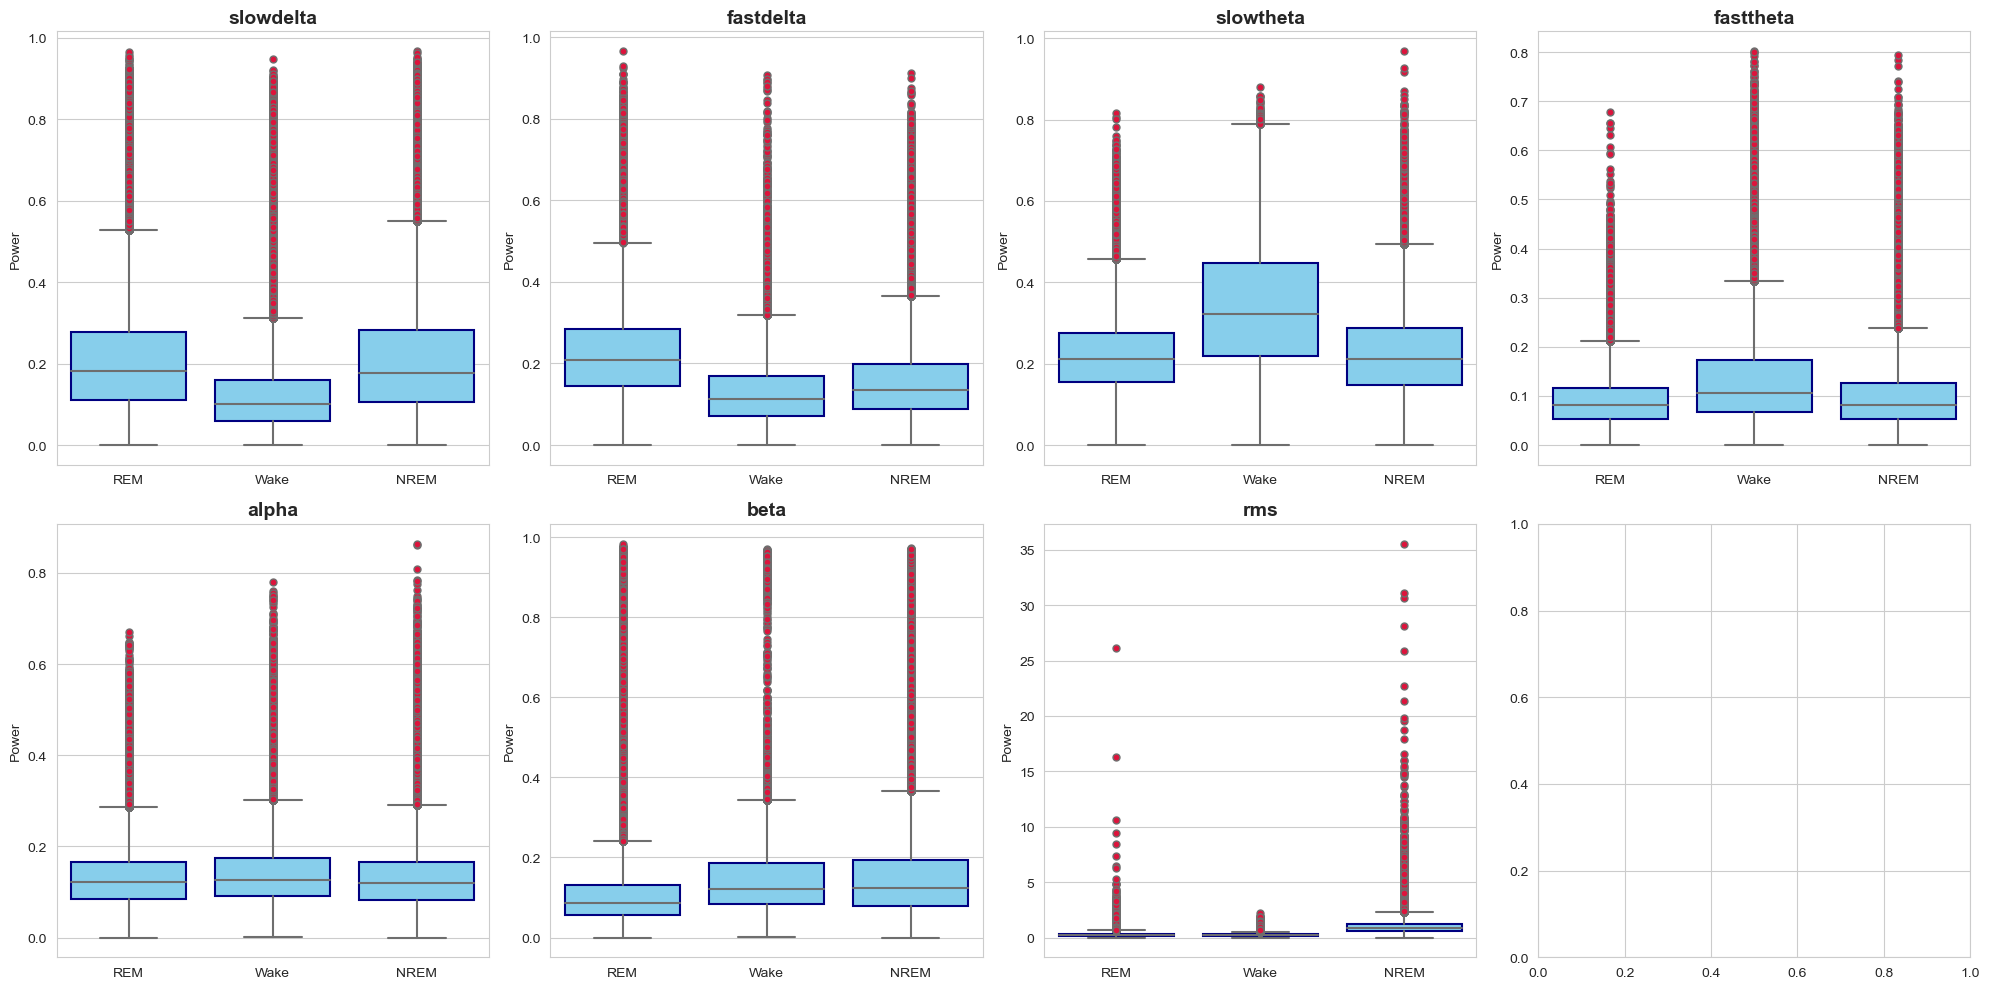

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()

# Define color palette and properties for box and fliers
palette = sns.color_palette("coolwarm", len(df['sleepstage_name'].unique()))
boxprops = dict(facecolor='skyblue', edgecolor='navy')
flierprops = dict(markerfacecolor='crimson', marker='o', markersize=5)

# Iterate over each EEG feature to create a boxplot for each
for ax, feature in zip(axes, eeg_features):
    sns.boxplot(x='sleepstage_name', y=feature, data=df, ax=ax,
                palette=palette, boxprops=boxprops, flierprops=flierprops)

    # Set title and labels
    ax.set_title(feature, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Power')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

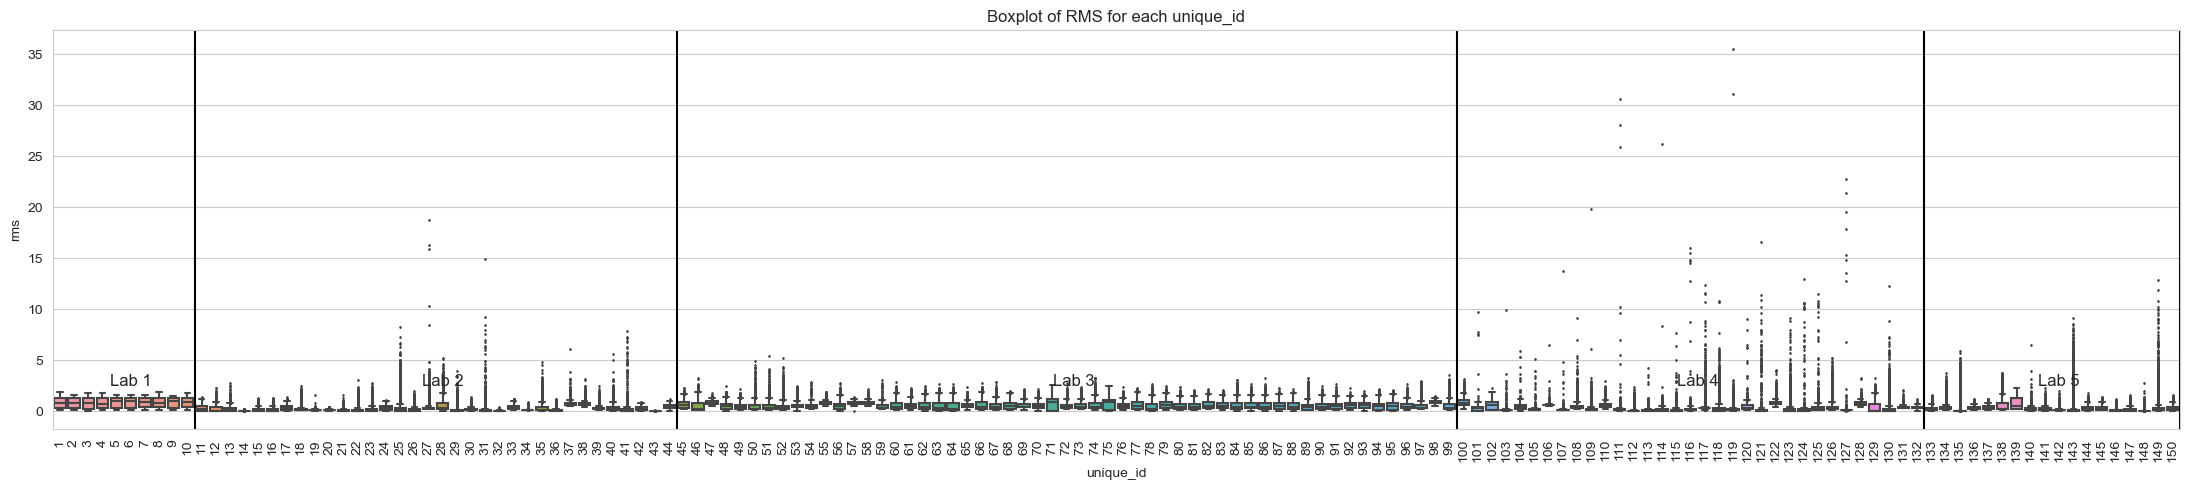

In [ ]:
plt.figure(figsize=(22, 5))
sns.boxplot(x='unique_id', y='rms', data=df, fliersize=1)
labindex = np.array(df.groupby('lab')['mouseID'].nunique())
labindex_cum = np.cumsum(labindex)
for i in range(len(labindex_cum)):
    plt.axvline(labindex_cum[i]-0.5, color='black', linestyle='-')
    plt.text(labindex_cum[i]-labindex[i]/2, 2.5, 'Lab ' + str(i+1), fontsize=12, ha='center')
plt.title('Boxplot of RMS for each unique_id')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

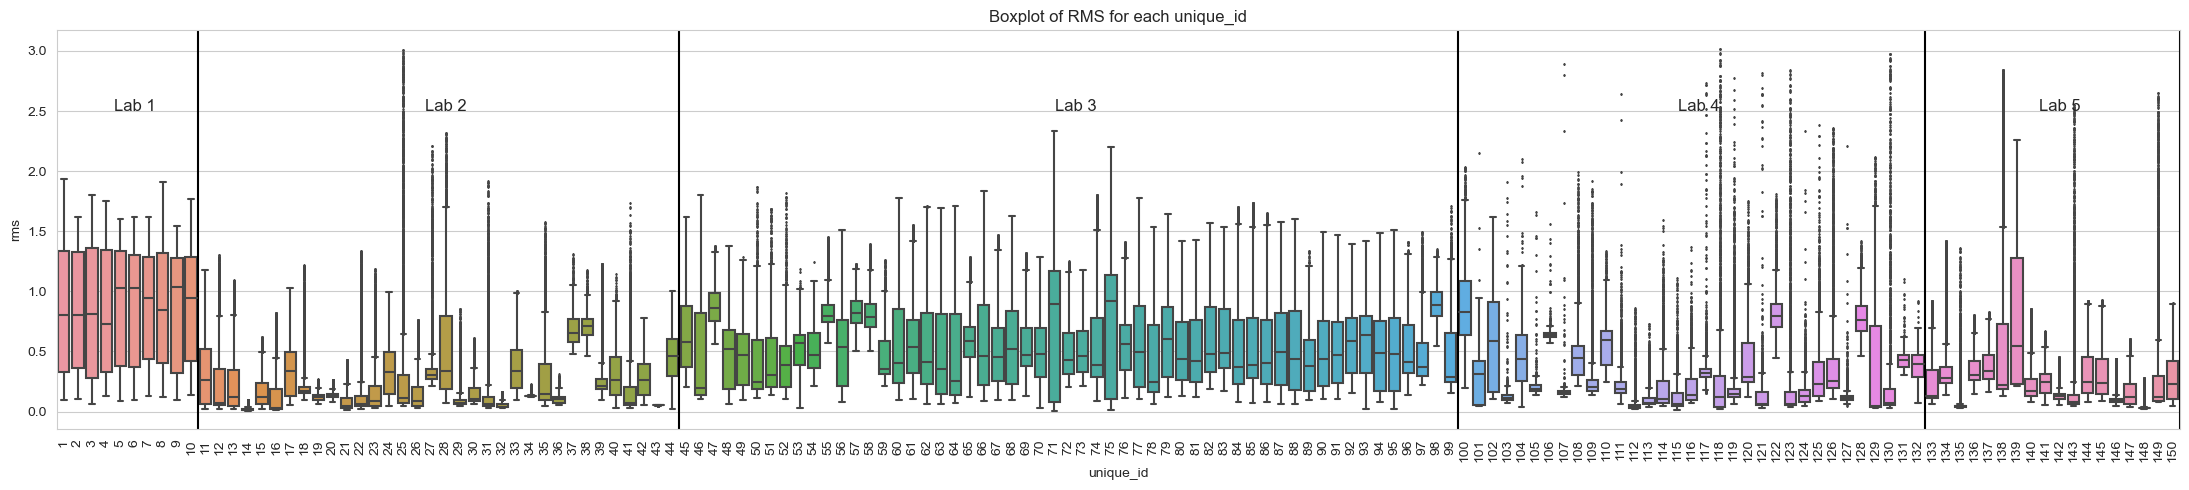

In [ ]:
# remove RMS outliers from each unique_id
for i in df['unique_id'].unique():
    # get the index of the unique_id
    index = df[df['unique_id'] == i].index
    # get the z-score of the RMS for the unique_id
    z = np.abs(stats.zscore(df.loc[index, 'rms']))
    # remove the outliers
    df1 = df.drop(index[np.where(z > 3)[0]])

# Create the boxplot
plt.figure(figsize=(22, 5))
bplot = sns.boxplot(x='unique_id', y='rms', data=df1, fliersize=1)

# Set box color and edge color
for box in bplot.artists:
    box.set_facecolor('skyblue')
    box.set_edgecolor('navy')

# Add vertical lines and lab text
labindex = np.array(df1.groupby('lab')['mouseID'].nunique())
labindex_cum = np.cumsum(labindex)
for i in range(len(labindex_cum)):
    plt.axvline(labindex_cum[i]-0.5, color='black', linestyle='-')
    plt.text(labindex_cum[i]-labindex[i]/2, 2.5, 'Lab ' + str(i+1), fontsize=12, ha='center')

# Set title and labels
plt.title('Boxplot of RMS for each unique_id')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

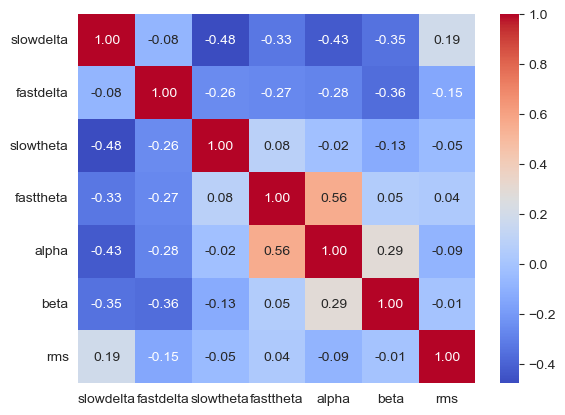

In [ ]:
# Calculate the correlation matrix
corr = df[['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'rms']].corr()

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

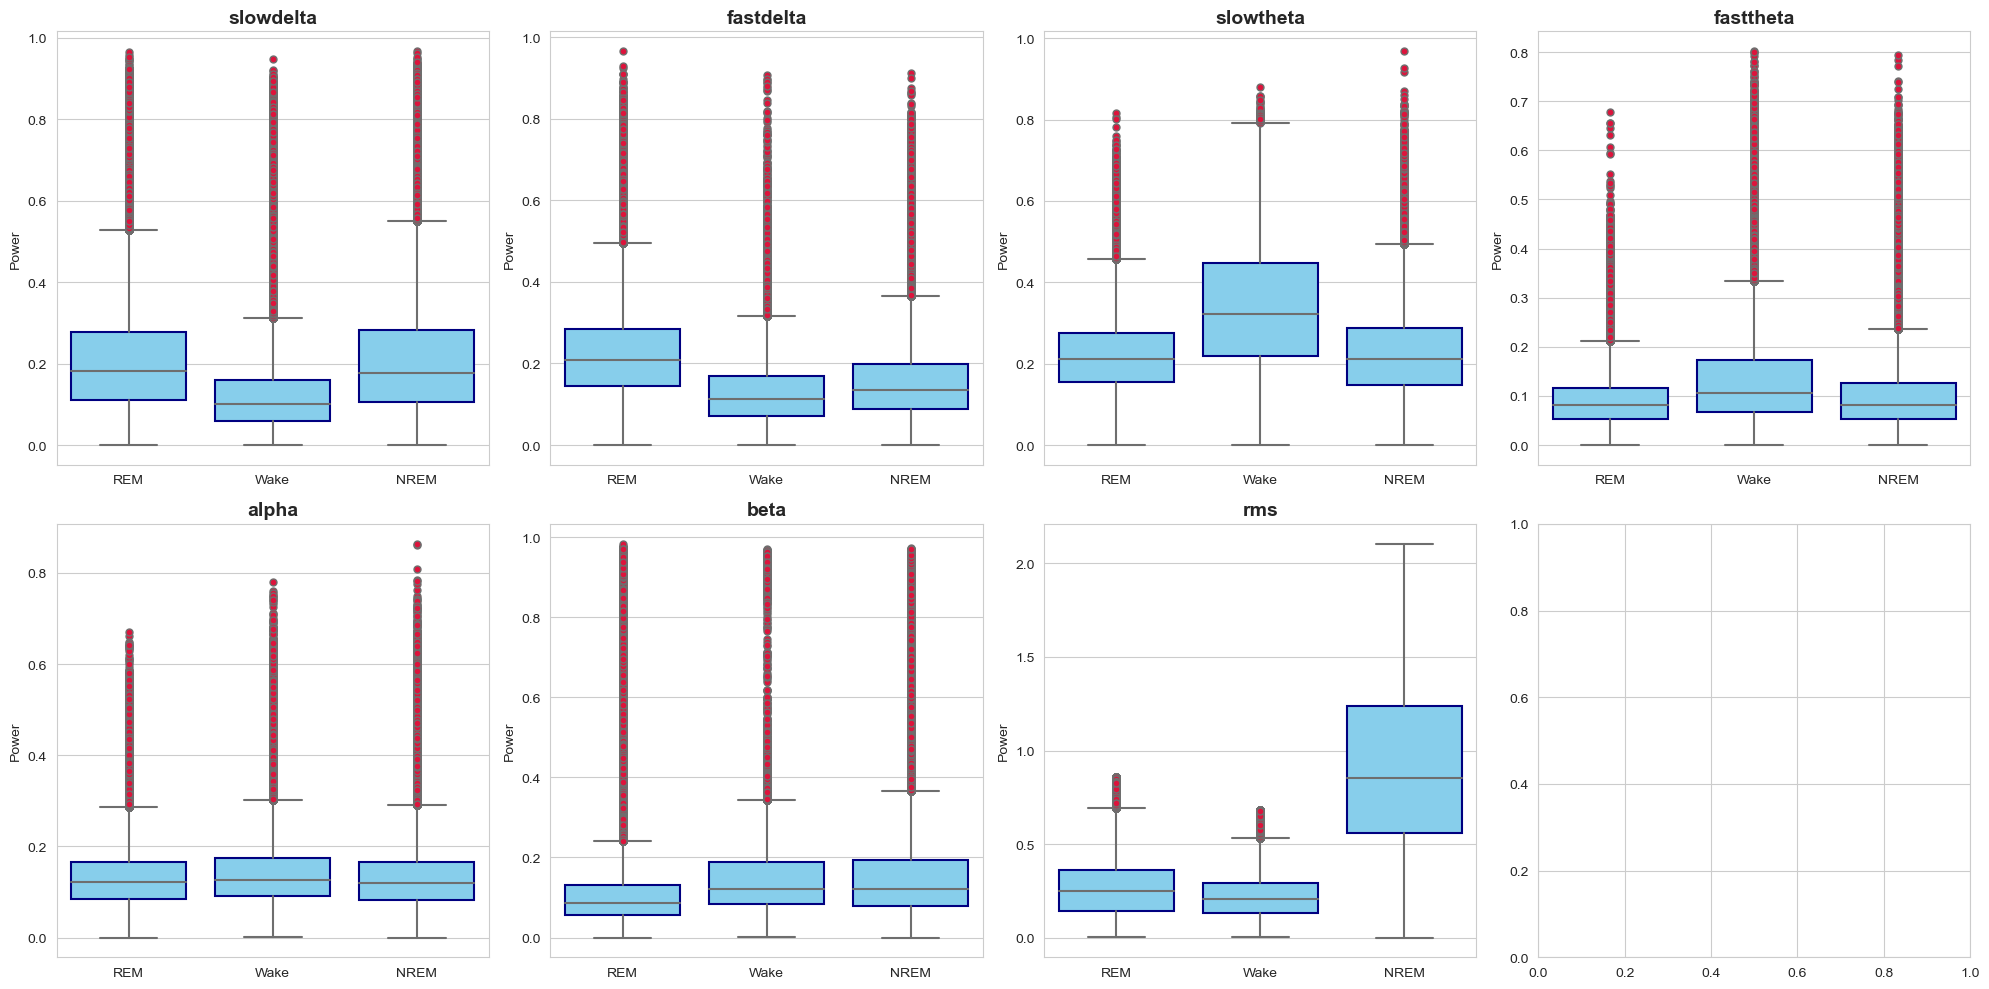

In [ ]:
# get the unique sleep stages
sleep_stages = df['sleepstage_name'].unique()

# for each sleep stage, calculate z-scores and remove outliers
for stage in sleep_stages:
    stage_df = df[df['sleepstage_name'] == stage]
    z = np.abs(stats.zscore(stage_df['rms']))
    df = df.drop(stage_df.index[np.where(z > 3)[0]])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()

# Define color palette and properties for box and fliers
palette = sns.color_palette("coolwarm", len(df['sleepstage_name'].unique()))
boxprops = dict(facecolor='skyblue', edgecolor='navy')
flierprops = dict(markerfacecolor='crimson', marker='o', markersize=5)

# Iterate over each EEG feature to create a boxplot for each
for ax, feature in zip(axes, eeg_features):
    sns.boxplot(x='sleepstage_name', y=feature, data=df, ax=ax,
                palette=palette, boxprops=boxprops, flierprops=flierprops)

    # Set title and labels
    ax.set_title(feature, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Power')

# Adjust layout and show plot
plt.tight_layout()
plt.show()